# Importing Libraries and Dataset


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import resample
from sklearn import preprocessing

import os 

dspath = []
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/EFFAH/THESIS/DDoS/Dataset/CICDDoS2019/CSV'):
    for filename in filenames:
        if filename.endswith('.csv'):
            dfp = os.path.join(dirname, filename)
            dspath.append(dfp)

cols = list(pd.read_csv(dspath[0], nrows=1))

def load_file(path):
    # data = pd.read_csv(path, sep=',')
    data = pd.read_csv(path,
                   usecols =[i for i in cols if i != " Source IP" 
                             and i != ' Destination IP' and i != 'Flow ID' 
                             and i != 'SimillarHTTP' and i != 'Unnamed: 0'])

    return data

In [2]:
dframe = pd.concat([load_file(dfp) for dfp in dspath], ignore_index=True)

# Description of the dataset

In [3]:
dframe.shape

(1130650, 83)

In [4]:
label_counts = dframe[' Label'].value_counts()
print(label_counts)

Syn              356496
TFTP             227223
DrDoS_NTP        129285
BENIGN           113065
Portmap           42606
LDAP              41801
UDP               33695
UDP-lag           33377
DrDoS_DNS         30618
MSSQL             25280
DrDoS_UDP         19413
DrDoS_MSSQL       18054
NetBIOS           16252
DrDoS_NetBIOS     15363
DrDoS_LDAP        14508
DrDoS_SNMP        13563
WebDDoS              51
Name:  Label, dtype: int64


In [5]:
print(dframe.columns)

Index([' Source Port', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packe

In [6]:
dframe.head()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,910,20073,17,2018-12-01 11:09:58.622545,48,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
1,588,39159,17,2018-12-01 11:10:43.911581,2,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
2,953,22161,17,2018-12-01 11:08:16.500655,1,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
3,663,18811,17,2018-12-01 11:11:00.683438,1,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
4,591,4168,17,2018-12-01 11:11:08.136206,1,2,0,2896.0,0.0,1448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS


In [7]:
col_name_consistency = {
'Flow ID': 'Flow ID',
'Source IP': 'Source IP',
'Src IP':  'Source IP',
'Source Port': 'Source Port',
'Src Port': 'Source Port',
'Destination IP': 'Destination IP',
'Dst IP': 'Destination IP',
'Destination Port': 'Destination Port',
'Dst Port': 'Destination Port',
'Protocol': 'Protocol',
'Timestamp': 'Timestamp',
'Flow Duration': 'Flow Duration',
'Total Fwd Packets': 'Total Fwd Packets',
'Tot Fwd Pkts': 'Total Fwd Packets',
'Total Backward Packets': 'Total Backward Packets',
'Tot Bwd Pkts': 'Total Backward Packets',
'Total Length of Fwd Packets': 'Fwd Packets Length Total',
'TotLen Fwd Pkts': 'Fwd Packets Length Total',
'Total Length of Bwd Packets': 'Bwd Packets Length Total',
'TotLen Bwd Pkts': 'Bwd Packets Length Total',
'Fwd Packet Length Max': 'Fwd Packet Length Max',
'Fwd Pkt Len Max': 'Fwd Packet Length Max',
'Fwd Packet Length Min': 'Fwd Packet Length Min',
'Fwd Pkt Len Min': 'Fwd Packet Length Min',
'Fwd Packet Length Mean': 'Fwd Packet Length Mean',
'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
'Fwd Packet Length Std': 'Fwd Packet Length Std',
'Fwd Pkt Len Std': 'Fwd Packet Length Std',
'Bwd Packet Length Max': 'Bwd Packet Length Max',
'Bwd Pkt Len Max': 'Bwd Packet Length Max',
'Bwd Packet Length Min': 'Bwd Packet Length Min',
'Bwd Pkt Len Min': 'Bwd Packet Length Min',
'Bwd Packet Length Mean': 'Bwd Packet Length Mean',
'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
'Bwd Packet Length Std': 'Bwd Packet Length Std',
'Bwd Pkt Len Std': 'Bwd Packet Length Std',
'Flow Bytes/s': 'Flow Bytes/s',
'Flow Byts/s': 'Flow Bytes/s',
'Flow Packets/s': 'Flow Packets/s',
'Flow Pkts/s': 'Flow Packets/s',
'Flow IAT Mean': 'Flow IAT Mean',
'Flow IAT Std': 'Flow IAT Std',
'Flow IAT Max': 'Flow IAT Max',
'Flow IAT Min': 'Flow IAT Min',
'Fwd IAT Total': 'Fwd IAT Total',
'Fwd IAT Tot': 'Fwd IAT Total',
'Fwd IAT Mean': 'Fwd IAT Mean',
'Fwd IAT Std': 'Fwd IAT Std',
'Fwd IAT Max': 'Fwd IAT Max',
'Fwd IAT Min': 'Fwd IAT Min',
'Bwd IAT Total': 'Bwd IAT Total',
'Bwd IAT Tot': 'Bwd IAT Total',
'Bwd IAT Mean': 'Bwd IAT Mean',
'Bwd IAT Std': 'Bwd IAT Std',
'Bwd IAT Max': 'Bwd IAT Max',
'Bwd IAT Min': 'Bwd IAT Min',
'Fwd PSH Flags': 'Fwd PSH Flags',
'Bwd PSH Flags': 'Bwd PSH Flags',
'Fwd URG Flags': 'Fwd URG Flags',
'Bwd URG Flags': 'Bwd URG Flags',
'Fwd Header Length': 'Fwd Header Length',
'Fwd Header Len': 'Fwd Header Length',
'Bwd Header Length': 'Bwd Header Length',
'Bwd Header Len': 'Bwd Header Length',
'Fwd Packets/s': 'Fwd Packets/s',
'Fwd Pkts/s': 'Fwd Packets/s',
'Bwd Packets/s': 'Bwd Packets/s',
'Bwd Pkts/s': 'Bwd Packets/s',
'Min Packet Length': 'Packet Length Min',
'Pkt Len Min': 'Packet Length Min',
'Max Packet Length': 'Packet Length Max',
'Pkt Len Max': 'Packet Length Max',
'Packet Length Mean': 'Packet Length Mean',
'Pkt Len Mean': 'Packet Length Mean',
'Packet Length Std': 'Packet Length Std',
'Pkt Len Std': 'Packet Length Std',
'Packet Length Variance': 'Packet Length Variance',
'Pkt Len Var': 'Packet Length Variance',
'FIN Flag Count': 'FIN Flag Count',
'FIN Flag Cnt': 'FIN Flag Count',
'SYN Flag Count': 'SYN Flag Count',
'SYN Flag Cnt': 'SYN Flag Count',
'RST Flag Count': 'RST Flag Count',
'RST Flag Cnt': 'RST Flag Count',
'PSH Flag Count': 'PSH Flag Count',
'PSH Flag Cnt': 'PSH Flag Count',
'ACK Flag Count': 'ACK Flag Count',
'ACK Flag Cnt': 'ACK Flag Count',
'URG Flag Count': 'URG Flag Count',
'URG Flag Cnt': 'URG Flag Count',
'CWE Flag Count': 'CWE Flag Count',
'CWE Flag Cnt': 'CWE Flag Count',
'ECE Flag Count': 'ECE Flag Count',
'ECE Flag Cnt': 'ECE Flag Count',
'Down/Up Ratio': 'Down/Up Ratio',
'Average Packet Size': 'Avg Packet Size',
'Pkt Size Avg': 'Avg Packet Size',
'Avg Fwd Segment Size': 'Avg Fwd Segment Size',
'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
'Avg Bwd Segment Size': 'Avg Bwd Segment Size',
'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
'Fwd Avg Bytes/Bulk': 'Fwd Avg Bytes/Bulk',
'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk': 'Fwd Avg Packets/Bulk',
'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate': 'Fwd Avg Bulk Rate',
'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk': 'Bwd Avg Bytes/Bulk',
'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk': 'Bwd Avg Packets/Bulk',
'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate': 'Bwd Avg Bulk Rate',
'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
'Subflow Fwd Packets': 'Subflow Fwd Packets',
'Subflow Fwd Pkts': 'Subflow Fwd Packets',
'Subflow Fwd Bytes': 'Subflow Fwd Bytes',
'Subflow Fwd Byts': 'Subflow Fwd Bytes',
'Subflow Bwd Packets': 'Subflow Bwd Packets',
'Subflow Bwd Pkts': 'Subflow Bwd Packets',
'Subflow Bwd Bytes': 'Subflow Bwd Bytes',
'Subflow Bwd Byts': 'Subflow Bwd Bytes',
'Init_Win_bytes_forward': 'Init Fwd Win Bytes',
'Init Fwd Win Byts': 'Init Fwd Win Bytes',
'Init_Win_bytes_backward': 'Init Bwd Win Bytes',
'Init Bwd Win Byts': 'Init Bwd Win Bytes',
'act_data_pkt_fwd': 'Fwd Act Data Packets',
'Fwd Act Data Pkts': 'Fwd Act Data Packets',
'min_seg_size_forward': 'Fwd Seg Size Min',
'Fwd Seg Size Min': 'Fwd Seg Size Min',
'Active Mean': 'Active Mean',
'Active Std': 'Active Std',
'Active Max': 'Active Max',
'Active Min': 'Active Min',
'Idle Mean': 'Idle Mean',
'Idle Std': 'Idle Std',
'Idle Max': 'Idle Max',
'Idle Min': 'Idle Min',
'Label': 'Label'
}

# Dataset Preprocessing

In [8]:
dframe.columns = [col.strip() for col in dframe.columns]   
dframe.rename(columns=col_name_consistency, inplace=True)
dframe['Label'].replace({'BENIGN': 'Benign'}, inplace=True)

# Feature Engineering on Timestamp

In [9]:
dframe['Timestamp'] = pd.to_datetime(dframe['Timestamp'], errors='coerce')

# Drop rows with NaN values (optional, depending on your analysis)
dframe.dropna(subset=['Timestamp'], inplace=True)

# Extract the time part and convert it to numeric format (in seconds since midnight)
dframe['Timestamp'] = dframe['Timestamp'].dt.hour * 3600 + dframe['Timestamp'].dt.minute * 60 + dframe['Timestamp'].dt.second
   

# Replacing Infinity and Nan with Mean of feature

In [10]:
for column in dframe.columns:
    if pd.api.types.is_numeric_dtype(dframe[column]):
        col_mean = dframe[column][np.isfinite(dframe[column])].mean()
        dframe[column].replace([np.nan, np.inf, -np.inf], col_mean, inplace=True)

# Removing Duplicates Records

In [11]:
print(dframe.duplicated().sum(), "fully duplicates removed")
dframe.drop_duplicates(inplace=True)
dframe.reset_index(inplace=True, drop=True)

7100 fully duplicates removed


In [12]:
dframe.shape

(1091660, 83)

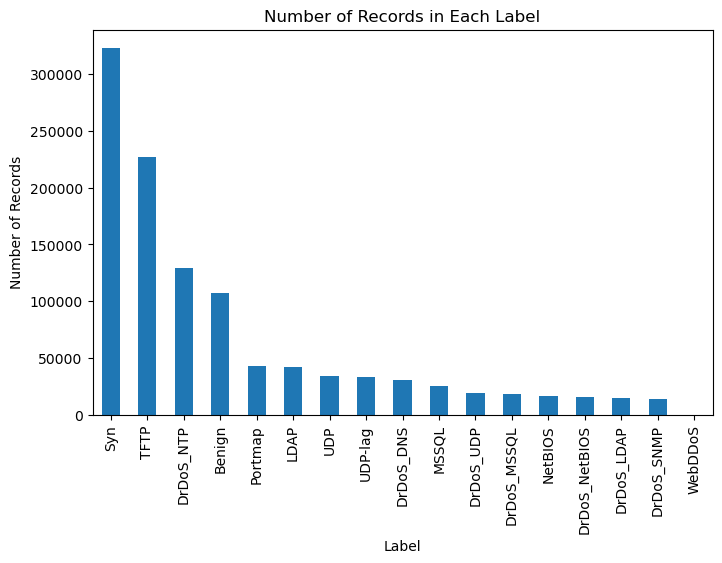

In [13]:
import matplotlib.pyplot as plt
# Count the occurrences of each label
label_num = dframe['Label'].value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(8, 5))
label_num.plot(kind='bar')
plt.title('Number of Records in Each Label')
plt.xlabel('Label')
plt.ylabel('Number of Records')
plt.show()

# Label Encoding

In [14]:
#Label
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the label column and transform the labels
dframe['Label'] = label_encoder.fit_transform(dframe['Label'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded Value: {encoded_value}")

Label: Benign - Encoded Value: 0
Label: DrDoS_DNS - Encoded Value: 1
Label: DrDoS_LDAP - Encoded Value: 2
Label: DrDoS_MSSQL - Encoded Value: 3
Label: DrDoS_NTP - Encoded Value: 4
Label: DrDoS_NetBIOS - Encoded Value: 5
Label: DrDoS_SNMP - Encoded Value: 6
Label: DrDoS_UDP - Encoded Value: 7
Label: LDAP - Encoded Value: 8
Label: MSSQL - Encoded Value: 9
Label: NetBIOS - Encoded Value: 10
Label: Portmap - Encoded Value: 11
Label: Syn - Encoded Value: 12
Label: TFTP - Encoded Value: 13
Label: UDP - Encoded Value: 14
Label: UDP-lag - Encoded Value: 15
Label: WebDDoS - Encoded Value: 16


# Dataset Splitting

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


X = dframe.drop('Label', axis=1)  # Features
y = dframe['Label'] 

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.1, random_state=0)

In [22]:
X_train.shape, y_train.shape, y_test.shape

((764162, 82), (764162,), (32750,))

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

input_shape = (X_train.shape[1],1)  # Number of features in the input data
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# build the cnn model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2)) 

rnn_model = Sequential()
rnn_model.add(GRU(64, input_shape=(cnn_model.output_shape[1], cnn_model.output_shape[2])))
rnn_model.add(Dropout(0.2))  
rnn_model.add(Flatten())
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(num_classes, activation='softmax'))

hybrid_model = Sequential()
hybrid_model.add(cnn_model)
hybrid_model.add(rnn_model)
hybrid_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()
rnn_model.summary()
# Print the summary of the RNN modeled dc
hybrid_model.summary()

hybrid_model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val))


# Evaluate the CNN,RNN model
score = hybrid_model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = hybrid_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_val, axis=1)

# Compute metrics
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
classification_rep = classification_report(y_test_classes, y_pred_classes, zero_division=0.0)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the metrics
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 80, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 40, 64)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 40, 64)            0         
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                24960     
  

KeyboardInterrupt: 

In [25]:
(X_train.shape[1],1)

(82, 1)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

input_shape = (X_train.shape[1],1)  # Number of features in the input data
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# build the cnn model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_shape)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2)) 

rnn_model = Sequential()
rnn_model.add(GRU(32, input_shape=(cnn_model.output_shape[1], cnn_model.output_shape[2])))
rnn_model.add(Dropout(0.2))  
rnn_model.add(Flatten())
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(num_classes, activation='softmax'))

hybrid_model = Sequential()
hybrid_model.add(cnn_model)
hybrid_model.add(rnn_model)
hybrid_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hybrid_model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val))


# Evaluate the CNN,RNN model
score = hybrid_model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = hybrid_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_val, axis=1)

# Compute metrics
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
classification_rep = classification_report(y_test_classes, y_pred_classes, zero_division=0.0)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the metrics
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Epoch 1/25
5971/5971 [==============================] - 545s 89ms/step - loss: 0.6482 - accuracy: 0.7860 - val_loss: 0.3403 - val_accuracy: 0.8789
Epoch 2/25
5971/5971 [==============================] - 491s 82ms/step - loss: 0.3953 - accuracy: 0.8622 - val_loss: 0.2793 - val_accuracy: 0.8939
Epoch 3/25
5971/5971 [==============================] - 455s 76ms/step - loss: 0.3146 - accuracy: 0.8940 - val_loss: 0.1933 - val_accuracy: 0.9369
Epoch 4/25
5971/5971 [==============================] - 478s 80ms/step - loss: 0.2477 - accuracy: 0.9205 - val_loss: 0.1327 - val_accuracy: 0.9639
Epoch 5/25
5971/5971 [==============================] - 483s 81ms/step - loss: 0.2020 - accuracy: 0.9376 - val_loss: 0.1199 - val_accuracy: 0.9665
Epoch 6/25
5971/5971 [==============================] - 483s 81ms/step - loss: 0.1821 - accuracy: 0.9441 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 7/25
5971/5971 [==============================] - 440s 74ms/step - loss: 0.1646 - accuracy: 0.9495 - val_loss: 0

C:\Users\SONGREEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[28835     6     0     0     7     6     0     1     0     0     0     4
      0     0     1     8     0]
 [    3  8096     6     0    22     2     0     0     0     1     0     1
      0     0     1     0     0]
 [    0     0  3857    10     0     0     0     0     0     0     0     0
      1     0     0     0     0]
 [    2     0    30  4621     0     5   113     1     0     0     0     0
      0     1     0     1     0]
 [  108     0     0     1 34746     0     0     0     0     0     0     0
      0     5     0     4     0]
 [    7     0     0    49     0  4026     3     1     0     0     0     0
      0     0     0     0     0]
 [    2     0     0     7     0   164  3473     0     0     0     0     0
      0     0     0     0     0]
 [   10     0     0     0     0     0     9  5273     0     0     0     0
      0     0     0     1     0]
 [    0     0     0     0     3     0     0     0 11230    10     0     0
      0     0     0     0     0]
 [    3     1     